In [11]:
!pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 6.9 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 23.2/23.2 MB 4.8 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 3.7/3.7 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 6.3 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     -------------------------------------- 895.9/895.9 kB 6.3 MB/s eta 0:00:00
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.wh

In [55]:
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL

import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T

from timm import create_model

In [94]:
model_name = "vit_base_patch16_224"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("device = ", device)
# create a ViT model : https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/vision_transformer.py
model = create_model(model_name, num_classes=102).to(device)

device =  cpu


In [95]:
# Define transforms for test
IMG_SIZE = (224, 224)
NORMALIZE_MEAN = (0.5, 0.5, 0.5)
NORMALIZE_STD = (0.5, 0.5, 0.5)
transforms_img = [
              T.Resize(IMG_SIZE),
              T.ToTensor(),
              T.Normalize(NORMALIZE_MEAN, NORMALIZE_STD),
              ]

transforms_img = T.Compose(transforms_img)

In [96]:
data_dir = os.path.join("Dataset", "Image_Data") 

person_no = 1
filter_no = 9
person_dir = os.path.join(data_dir, str(person_no)) 
filename = os.path.join(person_dir, "{}_Filtered_{}.jpg".format(person_no, filter_no))

In [102]:
import tensorflow as tf

img_height,img_width=256,256
batch_size=16
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)
type(train_ds)

Found 2040 files belonging to 102 classes.
Using 1632 files for training.


tensorflow.python.data.ops.dataset_ops.BatchDataset

In [98]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2040 files belonging to 102 classes.
Using 204 files for validation.


In [99]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2040 files belonging to 102 classes.
Using 204 files for validation.


In [100]:
classnames = dict(enumerate(train_ds.class_names))
print(len(train_ds.class_names))
(classnames)

102


{0: '1',
 1: '10',
 2: '100',
 3: '101',
 4: '102',
 5: '11',
 6: '12',
 7: '13',
 8: '14',
 9: '15',
 10: '16',
 11: '17',
 12: '18',
 13: '19',
 14: '2',
 15: '20',
 16: '21',
 17: '22',
 18: '23',
 19: '24',
 20: '25',
 21: '26',
 22: '27',
 23: '28',
 24: '29',
 25: '3',
 26: '30',
 27: '31',
 28: '32',
 29: '33',
 30: '34',
 31: '35',
 32: '36',
 33: '37',
 34: '38',
 35: '39',
 36: '4',
 37: '40',
 38: '41',
 39: '42',
 40: '43',
 41: '44',
 42: '45',
 43: '46',
 44: '47',
 45: '48',
 46: '49',
 47: '5',
 48: '50',
 49: '51',
 50: '52',
 51: '53',
 52: '54',
 53: '55',
 54: '56',
 55: '57',
 56: '58',
 57: '59',
 58: '6',
 59: '60',
 60: '61',
 61: '62',
 62: '63',
 63: '64',
 64: '65',
 65: '66',
 66: '67',
 67: '68',
 68: '69',
 69: '7',
 70: '70',
 71: '71',
 72: '72',
 73: '73',
 74: '74',
 75: '75',
 76: '76',
 77: '77',
 78: '78',
 79: '79',
 80: '8',
 81: '80',
 82: '81',
 83: '82',
 84: '83',
 85: '84',
 86: '85',
 87: '86',
 88: '87',
 89: '88',
 90: '89',
 91: '9',
 92:

In [101]:
import numpy
from PIL import Image



def PIL2array(img):
    return numpy.array(img.getdata(),
                    numpy.uint8).reshape(img.size[1], img.size[0], 3)

def array2PIL(arr, size):
    mode = 'RGBA'
    arr = arr.reshape(arr.shape[0]*arr.shape[1], arr.shape[2])
    if len(arr[0]) == 3:
        arr = numpy.c_[arr, 255*numpy.ones((len(arr),1), numpy.uint8)]
    return Image.frombuffer(mode, size, arr.tostring(), 'raw', mode, 0, 1)





for img in train_ds:
    im = Image.open("Dataset/Face Dataset/1/Filtered/1_1.jpg")
    # transform1 = T.ToTensor()
    print(im)
    # Convert the image to PyTorch tensor
    # tensor = transform1(im)
    img_tensor = transforms_img(im).unsqueeze(0).to(device)
    output = model(img_tensor)
    print(output)
    print("Inference Result: ", int(torch.argmax(output)))
    print(classnames[int(torch.argmax(output))])
    break

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1350x1350 at 0x1348EF1C2B0>
tensor([[ 0.4706, -1.0400, -0.0886, -0.2503, -0.1344,  0.0047, -0.1333,  0.0983,
         -0.3960, -0.4532, -0.4580,  0.0752, -0.2839, -0.2696, -0.4457, -0.5424,
         -0.4597, -0.4015,  0.4457, -0.3684, -0.0742, -0.3142, -0.0732,  0.2043,
         -0.1013,  0.5596,  0.4172,  0.2252, -0.3442,  0.2252,  0.1681, -0.6401,
         -0.2787, -0.3610,  0.5827, -0.0589, -0.2208, -1.2475, -0.7205, -0.1736,
         -0.3852,  0.1718,  1.1285, -1.1238,  0.5178,  0.0571, -1.1125,  0.3175,
         -0.1532, -0.2678,  0.2757,  0.7977, -0.9218, -0.5193, -0.5628,  0.6962,
         -0.2279,  0.0592, -1.0169, -0.1923,  0.6206, -0.3746, -0.1244, -0.0684,
          0.4378, -1.6207, -0.3381,  0.2692, -0.6885,  0.6681, -0.8888, -0.3096,
         -0.3004,  0.4346, -0.4562, -0.6974, -0.3565, -0.2035,  0.9783, -0.0226,
          0.2729, -0.3767,  0.6860, -0.7391, -1.0161, -0.0250, -0.3699,  0.1177,
         -0.5531, -0.1950,

In [104]:
!pip install fastai

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.



     -------------------------------------- 232.8/232.8 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 67.6/67.6 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 12.2/12.2 MB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB 1.2 MB/s eta 0:00:00
  Using cached cymem-2.0.7-cp39-cp39-win_amd64.whl (30 kB)
     ---------------------------------------- 2.2/2.2 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 96.8/96.8 kB 5.4 MB/s eta 0:00:00
  Using cached murmurhash-1.0.9-cp39-cp39-win_amd64.whl (18 kB)
     -------------------------------------- 181.6/181.6 kB 5.5 MB/s eta 0:00:00
     -------------------------------------- 482.8/482.8 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 5.9 MB/s eta 0:00:00
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Attempting uninstall:

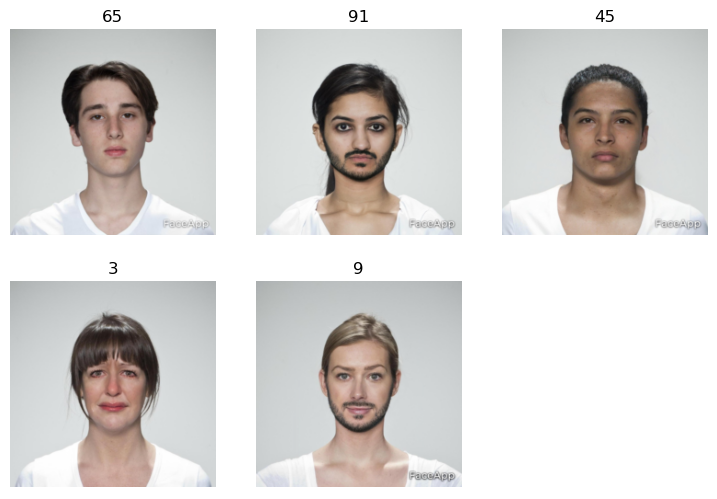

In [197]:
import pandas as pd
from fastai.vision.all import *

from sklearn.model_selection import train_test_split


df = pd.DataFrame()

data_dir = os.path.join("Dataset", "Image_Data") 

for person_no in range(1, 103):
    temp_df = pd.DataFrame()
    path = []
    label = []
    
    person_dir = os.path.join(data_dir, str(person_no)) 
    
    for filter_no in range(1, 11):
        filename = os.path.join(person_dir, "{}_Filtered_{}.jpg".format(person_no, filter_no))
        path.append(filename)
        label.append(person_no)
    
    temp_df["path"] = path
    temp_df["label"] = label
    
    df = pd.concat([df, temp_df], axis=0)
    

train, test = train_test_split(df, test_size=0.1)

dls = ImageDataLoaders.from_df(train, seed=42, valid_pct=0.1, item_tfms = Resize(224), path='.')

dls.valid.show_batch(max_n=5)
    
        

In [201]:
test['label'].unique()

array([36, 77,  8, 44, 16, 96, 52, 63,  7, 85, 14, 32, 13, 74, 78, 97, 35,
       22, 46, 59, 31, 38, 65, 90, 42, 39, 27, 19, 23, 68, 80, 11, 40, 26,
       99, 81, 73, 48, 62, 10, 98, 18,  2, 47, 33, 15, 37, 57, 95, 60, 79,
       84, 21,  4, 49, 91, 93, 29, 82, 75,  3, 87,  6, 83, 45, 61, 20, 41,
        1], dtype=int64)

In [202]:
    
# if a string is passed into the model argument, it will now use timm (if it is installed)
learn = vision_learner(dls, 'vit_tiny_patch16_224', metrics=accuracy)

learn.fit(20)

epoch,train_loss,valid_loss,accuracy,time
0,6.077201,4.637688,0.043956,03:07
1,5.352680,3.845613,0.120879,03:08
2,4.772652,3.276060,0.230769,03:08
3,4.215444,2.825705,0.351648,03:00
4,3.733405,2.396206,0.483516,03:01
5,3.309235,1.993424,0.582418,03:01
6,2.917329,1.697754,0.670330,03:13
7,2.569788,1.481350,0.714286,09:30
8,2.247157,1.311001,0.747253,11:41
9,1.965744,1.126495,0.780220,12:25


In [206]:
learn.save("vit_tiny_fine_tuned_model_20_epoch_with_train_test_validation_split")

Path('models/vit_tiny_fine_tuned_model_20_epoch_with_train_test_validation_split.pth')

In [207]:
learn.validate()

(#2) [0.4618036448955536,0.8791208863258362]

In [208]:
learn.validate(dl=dls.train)

(#2) [0.03782942518591881,0.9986979365348816]

In [ ]:
df_test = pd.DataFrame()

data_dir = os.path.join("Dataset", "Image_Data") 
path = []
label = []

for person_no in range(93, 103):
    temp_df = pd.DataFrame()
    
    
    person_dir = os.path.join(data_dir, str(person_no)) 
    
    for filter_no in range(1, 11):
        filename = os.path.join(person_dir, "{}_Filtered_{}.jpg".format(person_no, filter_no))
        path.append(filename)
        label.append(person_no)
    
    temp_df["path"] = path
    temp_df["label"] = label
    
#     df_test = pd.concat([df_test, temp_df], axis=0)
    
# print(df_test)
# dls_for_1 = ImageDataLoaders.from_df(df_test, item_tfms = Resize(224), path='.')
    
# dls_for_1.valid.show_batch(max_n=5)
path

In [225]:
actual = []
pred = []
for index, row in test.iterrows():
    # print(row['path'], row['label'])
    actual.append(row['label'])
    pred.append(Int(learn.predict(row['path'])[0]))
    
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(pred, actual)
acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
print('Overall accuracy: {} %'.format(acc*100))

Overall accuracy: 87.25490196078431 %


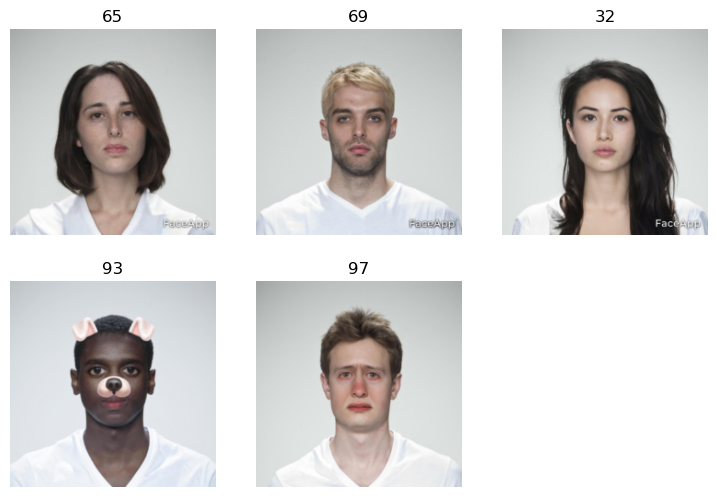

In [188]:
dls.valid.show_batch(max_n=5)

In [246]:
dls_test = ImageDataLoaders.from_df(test, valid_pct=0, item_tfms = Resize(224), path='.')
t = learn.get_preds(dl=dls_test.train)
print(t)

(tensor([[1.1432e-03, 1.0916e-02, 2.4646e-02,  ..., 6.1137e-03, 8.2174e-05,
         2.2725e-05],
        [1.8420e-04, 1.7698e-05, 2.8464e-04,  ..., 1.6387e-02, 1.9770e-03,
         1.5407e-04],
        [6.6145e-05, 1.4751e-02, 5.7143e-03,  ..., 2.2474e-03, 1.3953e-02,
         1.6024e-05],
        ...,
        [4.0756e-03, 9.2313e-04, 2.0414e-03,  ..., 1.8509e-03, 7.5649e-05,
         3.4540e-04],
        [6.2990e-05, 8.9780e-02, 3.8929e-03,  ..., 4.0665e-03, 1.0965e-02,
         3.4704e-04],
        [8.4026e-04, 1.1536e-04, 4.7359e-04,  ..., 1.2696e-03, 1.4904e-04,
         5.8339e-05]]), tensor([22, 29, 12, 56, 48, 29, 51, 38, 14, 45, 55, 50, 35, 37, 36, 25, 20,  6,
        60, 47, 17, 67,  6, 27, 63, 13,  6,  8, 52, 31, 51, 44, 18, 15, 49, 44,
        11, 12, 53, 49,  7, 28,  1, 24, 26, 62, 20, 41, 42, 57, 27, 30, 23, 21,
        10, 11, 17, 54, 56, 42, 55, 23, 59, 68,  5, 43, 33, 58, 36, 41, 28, 53,
        39, 62, 19,  3, 16, 47,  2,  9, 41, 61, 46, 64,  4,  0, 18, 46, 39, 66,
  

In [244]:
print(test)
print(dls_test.train)

                                        path  label
1    Dataset\Image_Data\36\36_Filtered_2.jpg     36
8    Dataset\Image_Data\77\77_Filtered_9.jpg     77
8      Dataset\Image_Data\8\8_Filtered_9.jpg      8
9   Dataset\Image_Data\44\44_Filtered_10.jpg     44
7    Dataset\Image_Data\16\16_Filtered_8.jpg     16
..                                       ...    ...
4    Dataset\Image_Data\41\41_Filtered_5.jpg     41
4    Dataset\Image_Data\82\82_Filtered_5.jpg     82
1    Dataset\Image_Data\22\22_Filtered_2.jpg     22
3      Dataset\Image_Data\1\1_Filtered_4.jpg      1
4    Dataset\Image_Data\15\15_Filtered_5.jpg     15

[102 rows x 2 columns]


In [259]:
learn.validate(dl=dls_test.train)

(#2) [9.27999496459961,0.046875]

In [260]:
interp = ClassificationInterpretation.from_learner(learn, dl=dls_test.train)

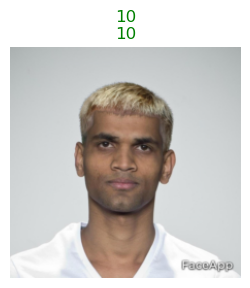

In [270]:
interp.show_results(26)

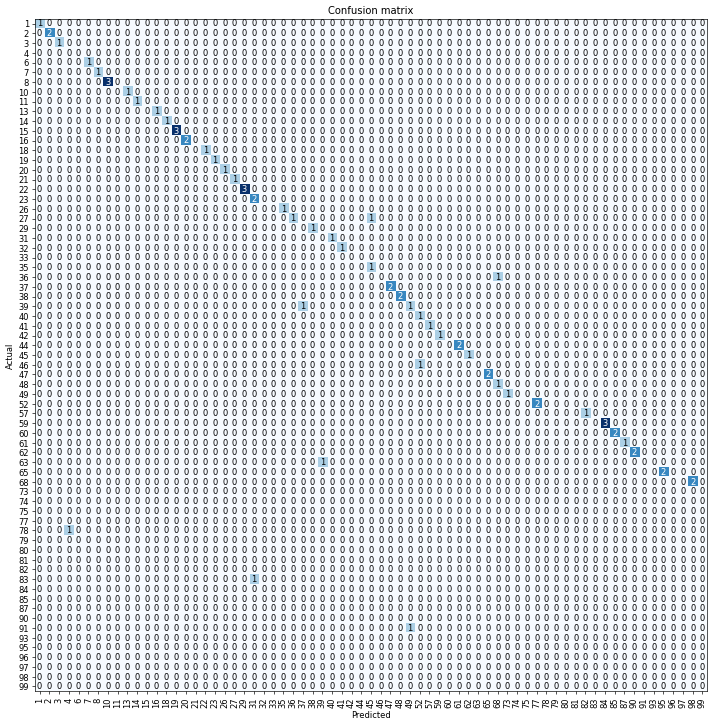

In [261]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [271]:
# Filter wise analysis

filterwise_accuracy = []

for filter_no in range(1, 11):
    correct = 0
    incorrect = 0
    
    for person_no in range(1, 103):
        person_dir = os.path.join(data_dir, str(person_no)) 
        
        filename = os.path.join(person_dir, "{}_Filtered_{}.jpg".format(person_no, filter_no))
        prediction = Int(learn.predict(filename)[0])
        if prediction == person_no:
            correct += 1
        else:
            incorrect += 1
            
    filterwise_accuracy.append((correct / (correct + incorrect)))
    

    
filterwise_accuracy
    
    
    
    

[0.9901960784313726,
 0.9607843137254902,
 0.9411764705882353,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8823529411764706,
 0.9803921568627451,
 1.0]

In [273]:
filterwise_accuracy_df = pd.DataFrame()
filter = ["Haircut", "Child", "Gender Reverse", "FaceApp-Hipster", "Blonde", "Puppy", "So Sad", "Snapchat-Hipster", "Sparkling Cartoon", "Body Mellow Glow"]
filterwise_accuracy_df["Filter"] = filter
filterwise_accuracy_df["Accuracy"] = filterwise_accuracy
filterwise_accuracy_df

,Filter,Accuracy
0,Haircut,0.990196
1,Child,0.960784
2,Gender Reverse,0.941176
3,FaceApp-Hipster,1.000000
4,Blonde,1.000000
5,Puppy,1.000000
6,So Sad,1.000000
7,Snapchat-Hipster,0.882353
8,Sparkling Cartoon,0.980392
9,Body Mellow Glow,1.000000


In [1]:
!pip install pandas
!pip install matplotlib
!pip install pdfkit


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
  
# dictionary with list object in values
details = {
    'Filter' : ["Haircut", "Child", "Gender Reverse", "FaceApp-Hipster", "Blonde", "Puppy", "So Sad", "Snapchat-Hipster", "Sparkling Cartoon", "Body Mellow Glow"],
    'Accuracy' : [0.990196, 0.960784, 0.941176, 1.000000, 1.000000, 1.000000, 1.000000, 0.882353, 0.980392, 1.000000],
}
  
# creating a Dataframe object 
filterwise_accuracy_df = pd.DataFrame(details)
filterwise_accuracy_df

,Filter,Accuracy
0,Haircut,0.990196
1,Child,0.960784
2,Gender Reverse,0.941176
3,FaceApp-Hipster,1.000000
4,Blonde,1.000000
5,Puppy,1.000000
6,So Sad,1.000000
7,Snapchat-Hipster,0.882353
8,Sparkling Cartoon,0.980392
9,Body Mellow Glow,1.000000


In [2]:
html = filterwise_accuracy_df.to_html()

In [3]:
with open('filterwise_accuracy_df.html', 'w') as f:
    f.write(html)